# Health Insurance Claim Prediction

### Story Telling 
    What DataSet is about ?
Dataset caontains the Age, Sex, bmi, Children, Smoker, Region, charges, and InsuranceClaim for the people who claim for the Health Insurance. And it is observed that the Target object is InsuranceClaim which mean it is Yes or No type
categorical predictions.
    
Assuming that the Age, smoker and bmi are the features that can contribute large for the target predictions
    


In [1]:
# Importing  Required Libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
print(df.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [4]:
print(df.shape)
print(df.info())

(1338, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB
None


In [5]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
feature_names = ['age','sex','bmi', 'children','smoker','region','charges']

x_feature = df[feature_names]
y_target = df['insuranceclaim']
y_target

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

1    783
0    555
Name: insuranceclaim, dtype: int64


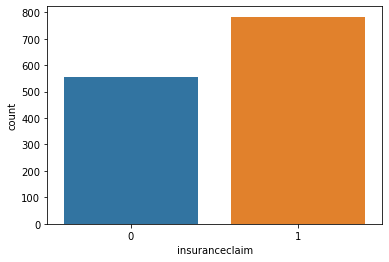

In [7]:
# 0 indicates insurance is not clamed
# 1 indicates insurance is clamed

print(df['insuranceclaim'].value_counts())

sns.countplot(x="insuranceclaim", data=df)
plt.show()

0    1064
1     274
Name: smoker, dtype: int64


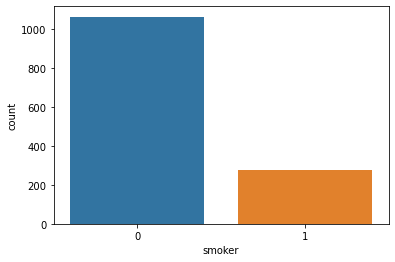

In [8]:
print(df['smoker'].value_counts())

sns.countplot(x="smoker", data=df)
plt.show()

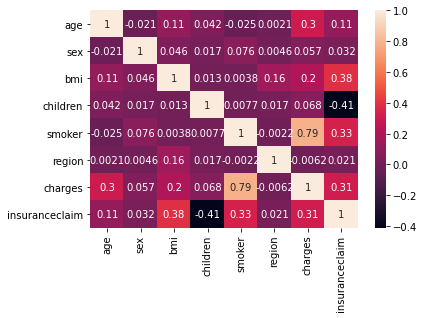

In [9]:
corr = df.corr()
sns.heatmap(df.corr(),xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()
# From the below correlation heatmap it can clearly seen that the childrens are notting to do for
# claiming the insurance and there is huge correlation that the age with charges. it means that the 
# persons age increases bmi and charges will increase. there is chance that the smokers are charged
# higher

In [10]:
# instantiate the linear model

logReg = LogisticRegression()

# splitting the dataset into two 25  and 75

xtrain,xtest,ytrain,ytest = train_test_split(x_feature,y_target,test_size = 0.25, random_state = 42)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

# means = np.mean(xtrain,axis=0)
# means
means = np.mean(xtrain,axis=0)
print(means)
stds = np.std(xtrain,axis=0)
print(stds)

xtrain = (xtrain - means)/stds
xtest = (xtest - means)/stds


(1003, 7) (335, 7) (1003,) (335,)
age            39.255234
sex             0.504487
bmi            30.511780
children        1.104686
smoker          0.205384
region          1.500499
charges     13267.935817
dtype: float64
age            14.032105
sex             0.499980
bmi             6.010108
children        1.204018
smoker          0.403982
region          1.114908
charges     12045.347393
dtype: float64


In [11]:
# Finding the Intercept

logReg.fit(xtrain,ytrain)

# Finding the Coefficient

print(logReg.intercept_)

print(logReg.coef_)


[0.72823536]
[[ 0.42390377  0.00847981  1.56300119 -1.73468897  1.68275313 -0.11717909
   0.05162642]]


In [12]:
ypredict = logReg.predict(xtest)

In [13]:
print('Accuracy of the predected model is:',accuracy_score(ytest,ypredict)*100,'%')

Accuracy of the predected model is: 86.56716417910447 %


Text(0.5, 0, 'Importance')

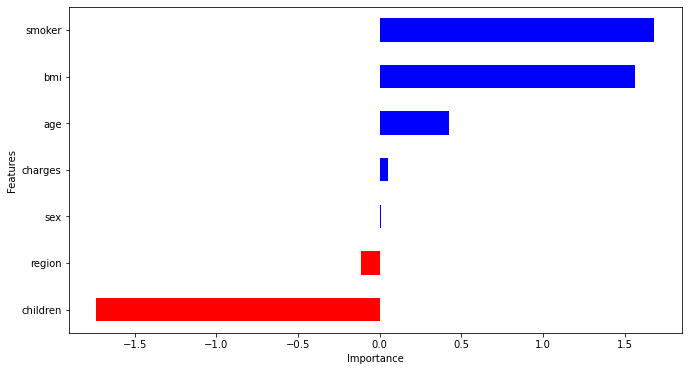

In [14]:
# Form the figure it is observed that the smoker, bmi, and age are most important factors for claming.  

coeff = list(logReg.coef_[0])
DataFrame = pd.DataFrame({'Features':feature_names,'importance':coeff})
DataFrame.sort_values(by=['importance'], ascending=True, inplace=True)
DataFrame['positive'] = DataFrame['importance'] > 0
DataFrame.set_index('Features', inplace=True)
DataFrame.importance.plot(kind='barh', figsize=(11, 6),color = DataFrame.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')